# Задание
1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Smet1/bmstu_ml/master/lab4/data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 4600 строк и 18 столбца.


# Проведение разведочного анализа данных

## Подготовка данных

### Обработка пропусков в данных

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Кодирование признаков

In [6]:
from sklearn.preprocessing import LabelEncoder

cols = []
for col in df.columns:
  column_type = df[col].dtype
  if column_type == 'object':
    cols.append(col)

cols

['date', 'street', 'city', 'statezip', 'country']

In [7]:
# кодируем
for col in cols:
  print(col)
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

date
street
city
statezip
country


In [0]:
# проверяем остались ли признаки
for col in df.columns:
  column_type = df[col].dtype
  if column_type == 'object':
    print(col)

### Визуальное исследование датасета

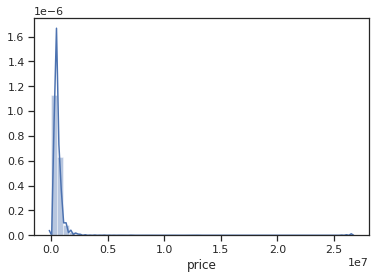

In [9]:
import seaborn as sns

# Оценка распределения целевого признака
sns.distplot(df['price']);

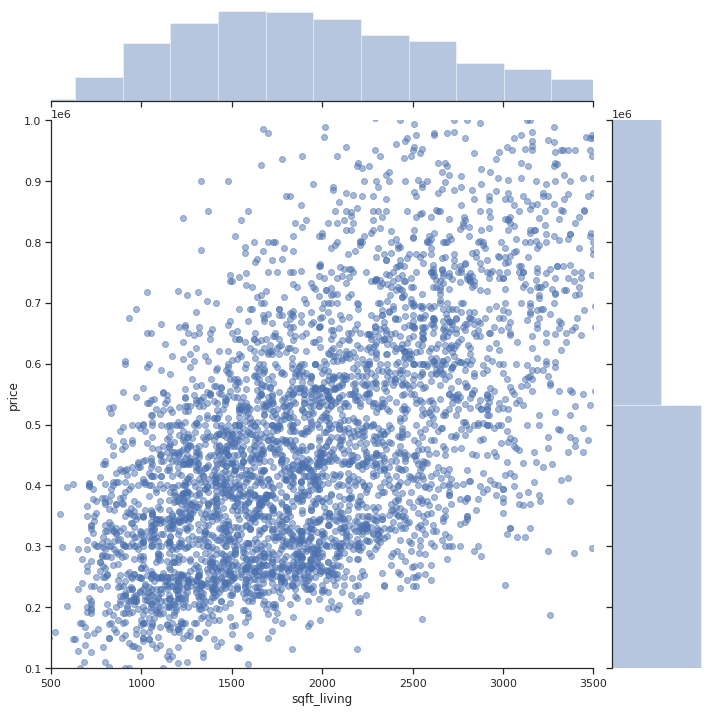

In [10]:
# Зависимость цены от площади (ограничивая цену от 100к до 10000к и площади от 500 до 3500)
sns.jointplot(x='sqft_living', y='price', data=df, xlim=(500, 3500), ylim=(100000, 1000000), height=10, alpha=.5)

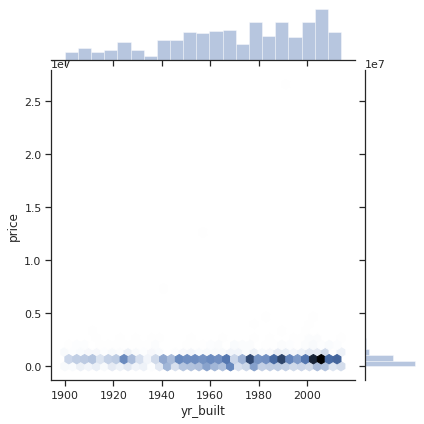

In [11]:
# Зависимость цены от даты постройки
sns.jointplot(x='yr_built', y='price', data=df, kind='hex');

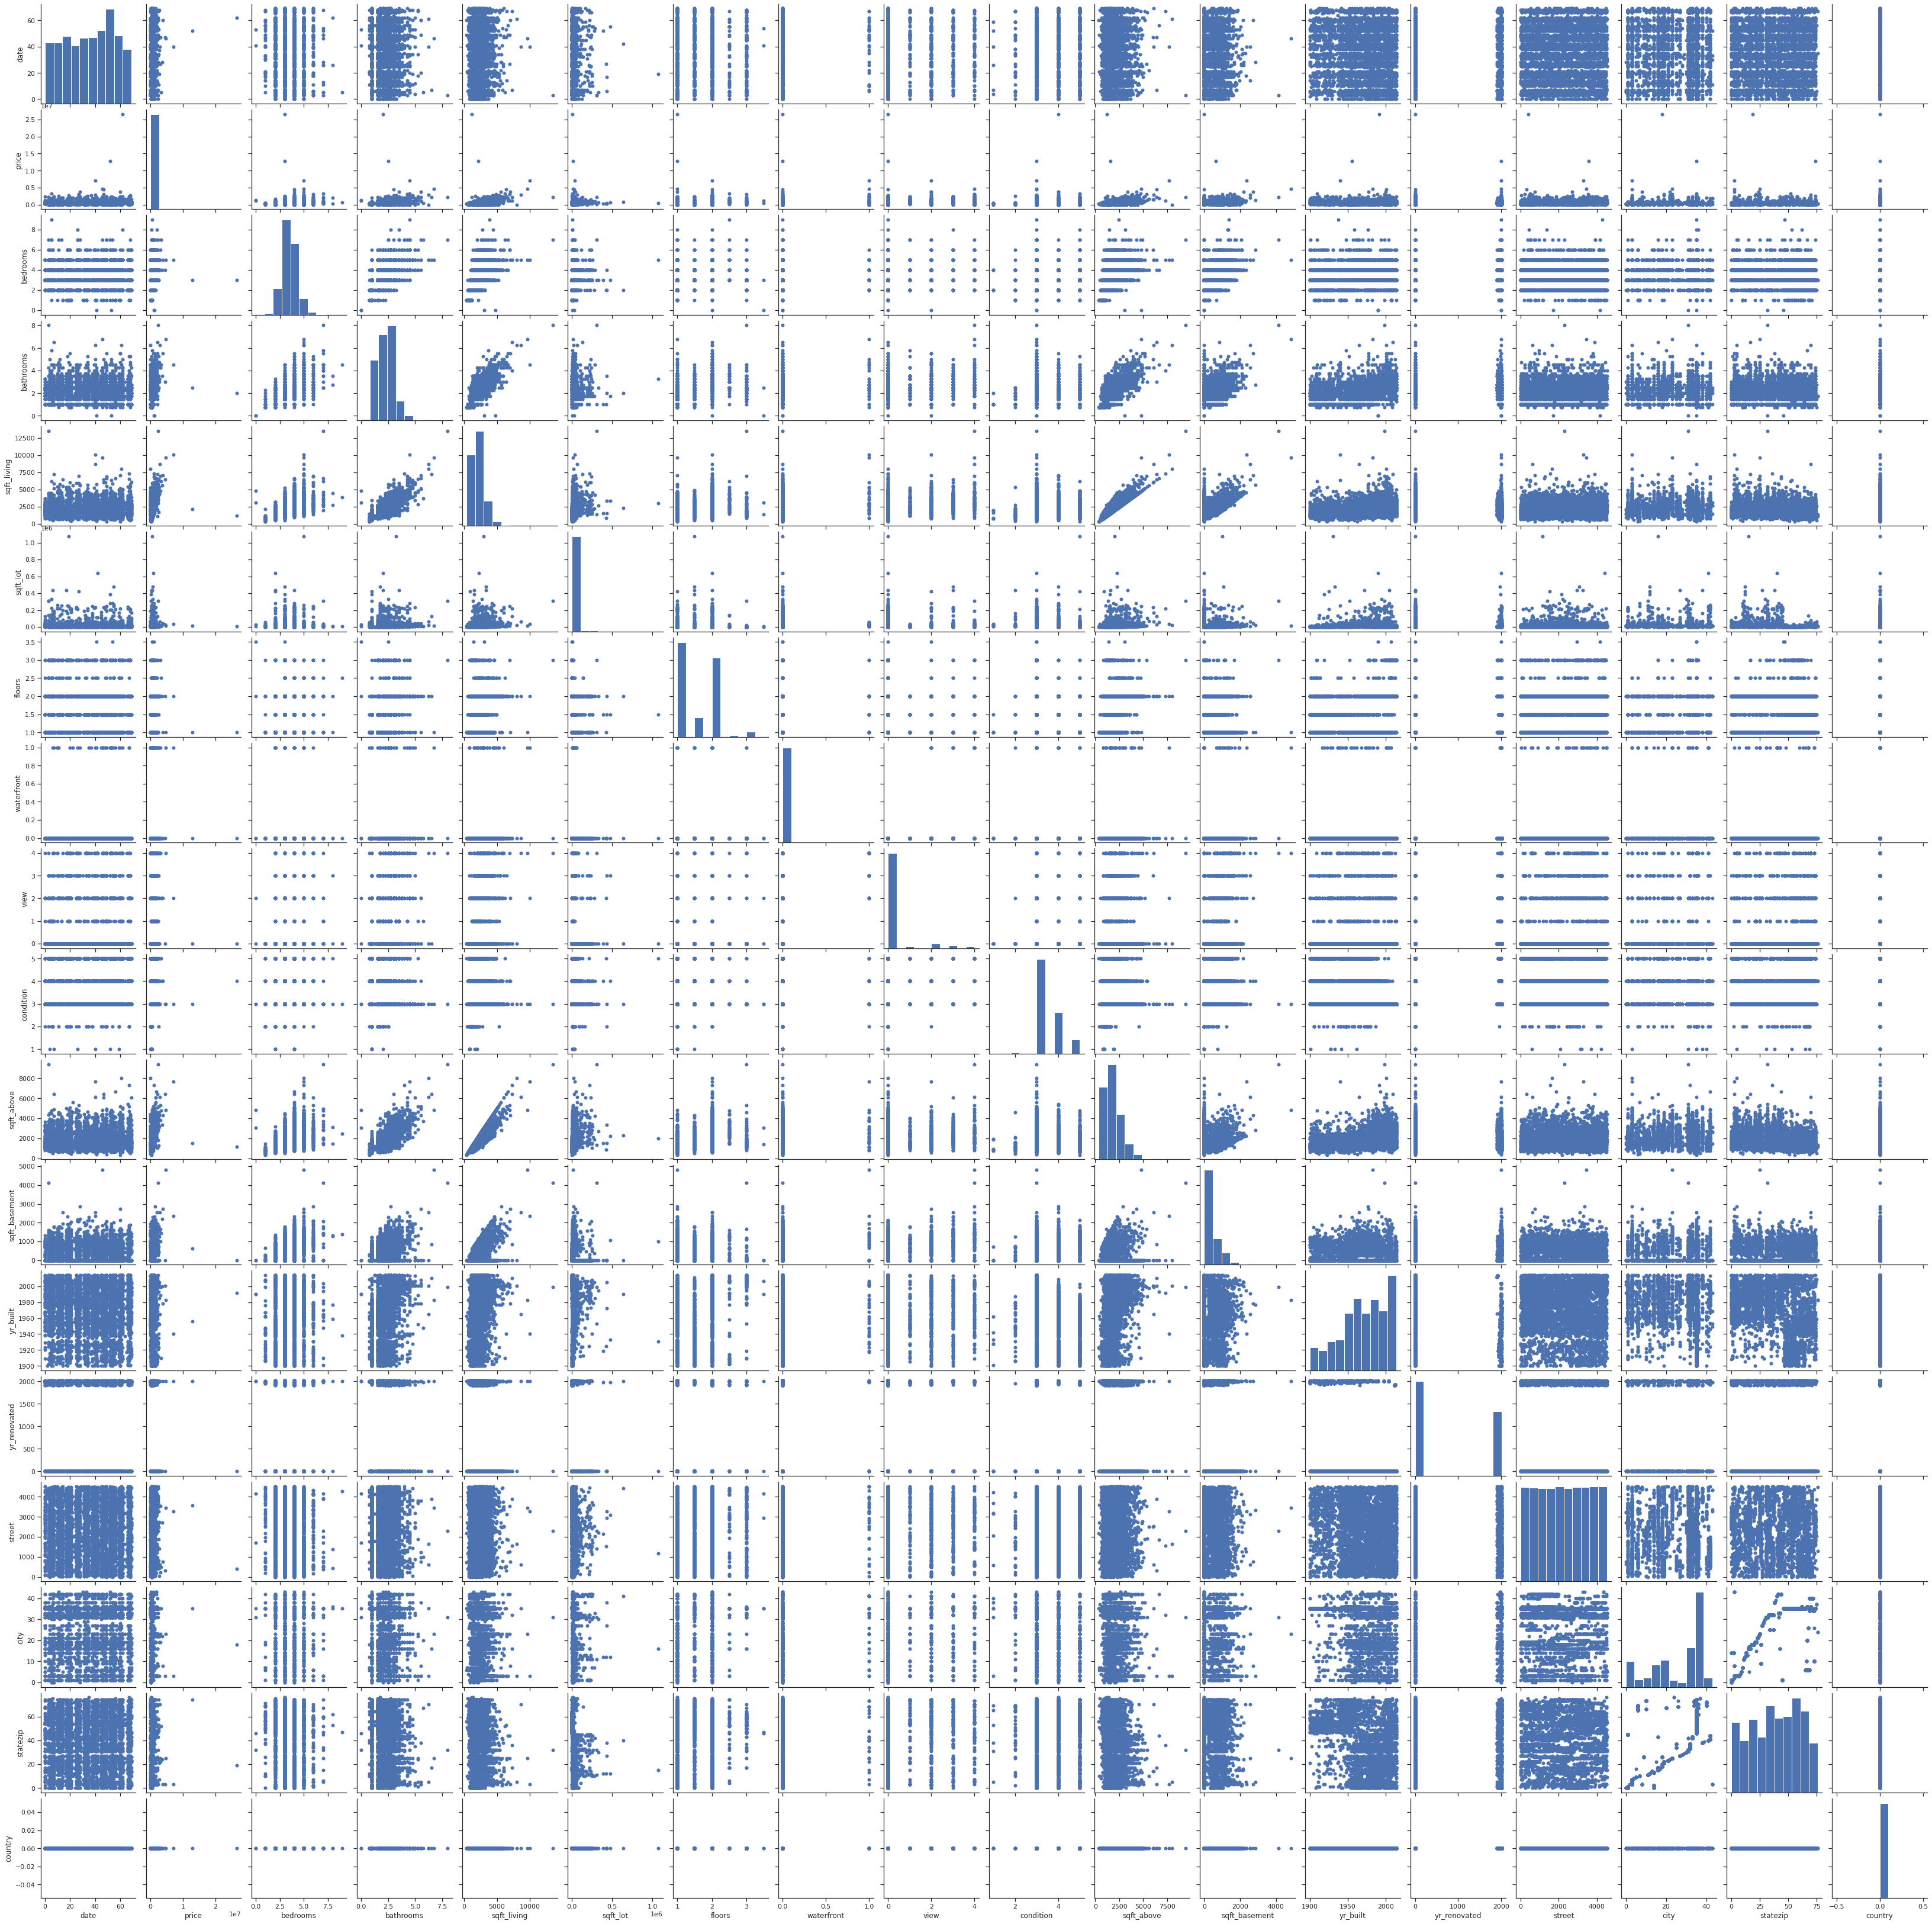

In [12]:
# Парные диаграммы
sns.pairplot(df, plot_kws=dict(linewidth=0));

### Корреляционный анализ

In [13]:
df.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,1.000000,0.033906,0.005762,0.019263,0.029481,-0.020393,0.029607,0.017586,0.005844,0.007853,0.041038,-0.015050,0.001356,-0.018437,-0.005089,-0.020325,-0.004546,NaN
price,0.033906,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.029366,0.018625,-0.043385,NaN
bedrooms,0.005762,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,-0.035507,-0.130447,-0.152773,NaN
bathrooms,0.019263,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,0.007175,-0.097026,-0.194497,NaN
sqft_living,0.029481,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.006411,-0.109686,-0.198918,NaN
sqft_lot,-0.020393,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,-0.023028,-0.079135,-0.128466,NaN
floors,0.029607,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,0.056191,0.078481,-0.038943,NaN
waterfront,0.017586,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.035448,0.001450,0.007938,NaN
view,0.005844,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.065077,0.001340,0.079340,NaN
condition,0.007853,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,-0.005480,-0.010592,0.027666,NaN


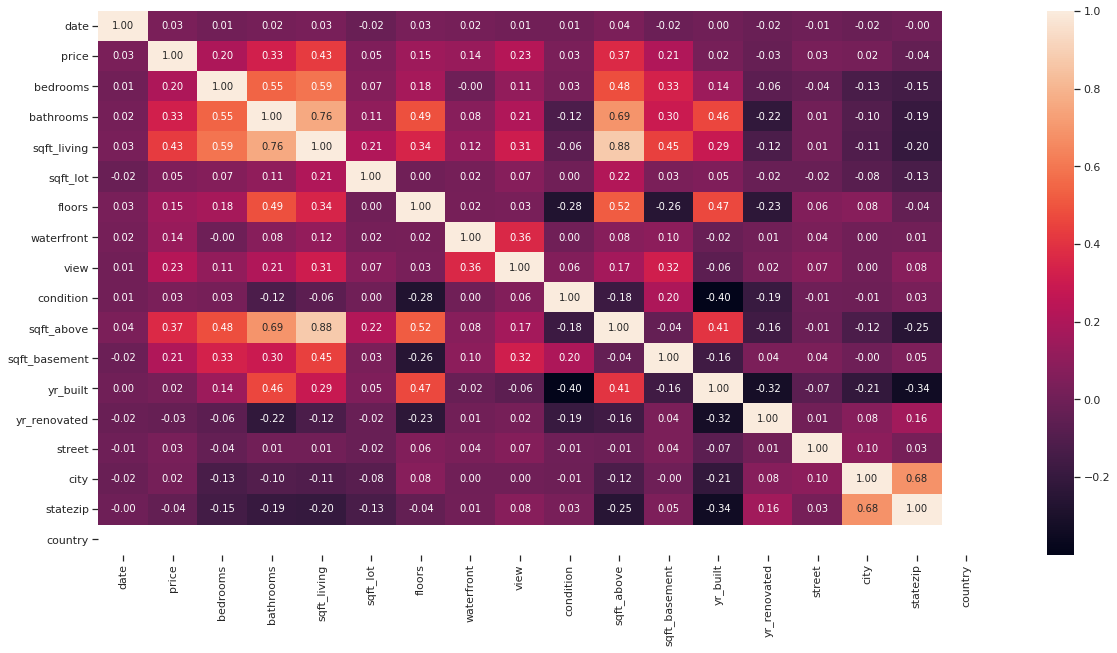

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [15]:
corr_matrix = df.corr()
# наиболее коррелирующие признаки
corr_matrix['price'].nlargest(5)

price          1.000000
sqft_living    0.430410
sqft_above     0.367570
bathrooms      0.327110
view           0.228504
Name: price, dtype: float64

Видно, что цена несколько зависит от жилой площади и количества ванных комнат (но они сильно коррелируют с площадью, поэтому их можно не учитывать)

# Подготовка данных для обучения моделей

In [16]:
# попробуем ограничить цену сверху и снизу (100000, 1000000)
indexNames = df[ df['price'] < 100000 ].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['price'] > 1000000 ].index
df.drop(indexNames, inplace=True)

corr_matrix = df.corr()
# наиболее коррелирующие признаки
corr_matrix['price'].nlargest(6)

price          1.000000
sqft_living    0.607418
sqft_above     0.518590
bathrooms      0.458910
bedrooms       0.301285
floors         0.270727
Name: price, dtype: float64

In [17]:
# и площадь (500,3500)
indexNames = df[ df['sqft_living'] < 500 ].index
df.drop(indexNames, inplace=True)

indexNames = df[ df['sqft_living'] > 3500 ].index
df.drop(indexNames, inplace=True)

corr_matrix = df.corr()
# наиболее коррелирующие признаки
corr_matrix['price'].nlargest(6)

price          1.000000
sqft_living    0.578427
sqft_above     0.466433
bathrooms      0.414361
bedrooms       0.269759
floors         0.246393
Name: price, dtype: float64

In [18]:
#Разделим на целевой столбец и признаки
# x = df.drop('price', axis=1)
# показания хуже только с наиболее коррелирующими признаками
# x = df[['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors']]
x = df.drop(['city', 'street', 'country', 'statezip', 'price'], axis=1)
y = df['price']

print(x.head())
print(y.head())

   date  bedrooms  bathrooms  ...  sqft_basement  yr_built  yr_renovated
0     0       3.0       1.50  ...              0      1955          2005
2     0       3.0       2.00  ...              0      1966             0
3     0       3.0       2.25  ...           1000      1963             0
4     0       4.0       2.50  ...            800      1976          1992
5     0       2.0       1.00  ...              0      1938          1994

[5 rows x 13 columns]
0    313000.0
2    342000.0
3    420000.0
4    550000.0
5    490000.0
Name: price, dtype: float64


In [19]:
print('Признаки: {} строк и {} столбца.'.format(x.shape[0], x.shape[1]))
print('Целевой столбец: {} строк'.format(y.shape[0]))

Признаки: 4019 строк и 13 столбца.
Целевой столбец: 4019 строк


In [20]:
from sklearn.preprocessing import StandardScaler

columns = x.columns
scaler = StandardScaler()

x = scaler.fit_transform(x)
pd.DataFrame(x, columns=columns).describe()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03,4.019000e+03
mean,-8.762447e-16,-5.427634e-16,4.151665e-16,-1.785362e-16,8.190623e-18,5.701115e-16,-4.861508e-16,-2.127352e-16,-1.254698e-16,-1.825003e-16,-2.977630e-16,-2.216137e-15,-1.056908e-16
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-1.830185e+00,-2.709556e+00,-1.942118e+00,-2.124490e+00,-3.675494e-01,-8.849427e-01,-5.696606e-02,-2.467971e-01,-3.652564e+00,-1.758724e+00,-6.705461e-01,-2.371144e+00,-8.370612e-01
25%,-8.631978e-01,-3.557885e-01,-8.034232e-01,-7.726561e-01,-2.431324e-01,-8.849427e-01,-5.696606e-02,-2.467971e-01,-6.758521e-01,-7.792758e-01,-6.705461e-01,-6.765119e-01,-8.370612e-01
50%,1.037889e-01,-3.557885e-01,-4.429358e-02,-8.110902e-02,-1.726860e-01,-8.849427e-01,-5.696606e-02,-2.467971e-01,-6.758521e-01,-2.506845e-01,-6.705461e-01,1.030188e-01,-8.370612e-01
75%,8.671995e-01,8.210954e-01,7.148360e-01,7.118446e-01,-9.344090e-02,9.820309e-01,-5.696606e-02,-2.467971e-01,8.125039e-01,6.043895e-01,6.861907e-01,8.486568e-01,1.198984e+00
max,1.681504e+00,5.528631e+00,4.890049e+00,2.419745e+00,3.050179e+01,3.782491e+00,1.755431e+01,6.570230e+00,2.300860e+00,2.874222e+00,3.758048e+00,1.492617e+00,1.214262e+00


In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

# функция, которая считает метрики построенной модели
def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(y_test, model.predict(x_test)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(y_test, model.predict(x_test)), 2)))
    print('r2_score: {}'.format(round(r2_score(y_test, model.predict(x_test)), 2)))

# Формирование обучающей и тестовой выборок

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=2)

In [23]:
print('Признаки обучающие: {} строк и {} столбца.'.format(x_train.shape[0], x_train.shape[1]))
print('Признаки тестовые: {} строк и {} столбца.'.format(x_test.shape[0], x_test.shape[1]))

print('Целевой столбец обучающий: {} строк'.format(y_train.shape[0]))
print('Целевой столбец тестоый: {} строк'.format(y_test.shape[0]))

Признаки обучающие: 3617 строк и 13 столбца.
Признаки тестовые: 402 строк и 13 столбца.
Целевой столбец обучающий: 3617 строк
Целевой столбец тестоый: 402 строк


# Построение базового решения

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Метод k ближайших соседей

In [25]:
# C гиперпараметром k=5
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [26]:
test_model(knn_5)

mean_absolute_error: 120542.9
median_absolute_error: 100155.78
r2_score: 0.33


## Дерево решений

In [27]:
# С неограниченной глубиной
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [28]:
test_model(dt_none)

mean_absolute_error: 156197.96
median_absolute_error: 135000.0
r2_score: -0.14


## Случайный лес

In [29]:
# С гиперпараметром n=100:
ran_100 = RandomForestRegressor(n_estimators=100)
ran_100.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
test_model(ran_100)

mean_absolute_error: 113565.27
median_absolute_error: 94677.9
r2_score: 0.41


# Подбор гиперпараметров

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

## Метод k ближайших соседей

In [32]:
# Cписок настраиваемых параметров
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'n_neighbors': param_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [0]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(x, y)
reg = gs.best_estimator_

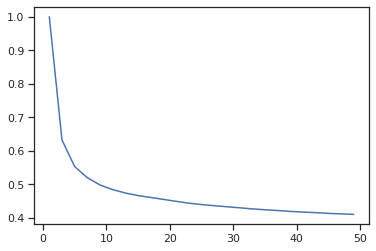

In [34]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

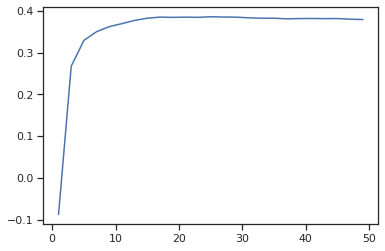

In [35]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [36]:
reg.fit(x_train, y_train)
test_model(reg)

mean_absolute_error: 117338.61
median_absolute_error: 103549.25
r2_score: 0.38


## Дерево решений

In [37]:
# Cписок настраиваемых параметров
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [0]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(x, y)
reg = gs.best_estimator_

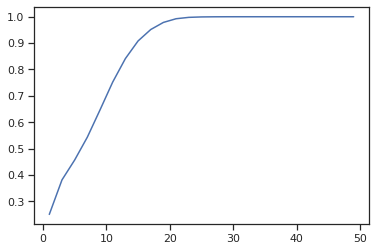

In [39]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

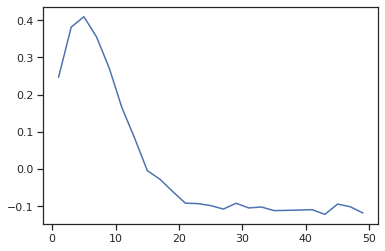

In [40]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [41]:
reg.fit(x_train, y_train)
test_model(reg)

mean_absolute_error: 123951.39
median_absolute_error: 104020.85
r2_score: 0.31


## Случайный лес

In [42]:
# Cписок настраиваемых параметров
param_range = np.arange(20, 201, 20)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])}]

In [0]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(x, y)
reg = gs.best_estimator_

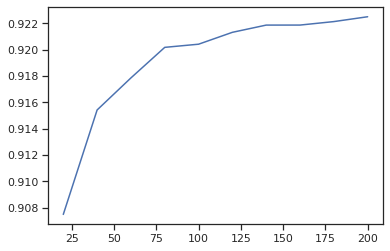

In [44]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

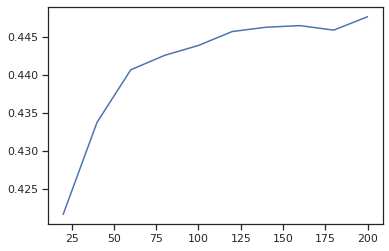

In [45]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [46]:
reg.fit(x_train, y_train)
test_model(reg)

mean_absolute_error: 114582.66
median_absolute_error: 95899.38
r2_score: 0.4


Видно что модели с подобранными гиперпараметрами показывают лучший результат.

Мы построили 3 модели с оптимальными гиперпараметрами
* К ближайших соседей: 0.38
* Дерево решений: 0.31
* Случайный лес: 0.4

Значения отличаются в пределах 0.1, для более точной оценки нужен датасет с большим количеством данных. Но для текущего состояния лучшим является случайный лес